In [7]:
import matplotlib.pyplot as plt                                                                                                                                                               
import numpy as np
import json
import os
print(os.getcwd())
ABS = '/home/tim/Data/cloud/uni/work/BA/thesis/graphs_maker/'


/home/tim/Data/cloud/uni/work/BA/thesis/graphs_maker/i6_experiments/users/schupp/hybrid_hmm_nn/plot_makers


In [8]:
ex = "baseline_07_big_short"
sub_ex = "baseline_07_big_short+num-blocks-XXX-aux-at-half"

experiments = []
_set = "dev-other"

blocks = list(range(10, 16+1))

for x in range(10, 16+1):
    if x == 12:
        experiments.append(f'{ex}/{ex}')
    else:
        experiments.append(f'{ex}/{sub_ex.replace("XXX", str(x))}')

paths = []

for ex in experiments:
    paths.append(f'{ABS}/results2/{ex}.json')

datas = []

for p in paths:

    with open(p) as data_file:
        data = json.load(data_file)

    datas.append(data)


[40.0, 80.0, 100.0, 119.0, 120.0]
[10.06, 8.57, 8.3, 8.19, 8.01]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.98, 8.43, 8.2, 8.04, 7.96]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.88, 8.47, 8.29, 7.98, 7.87]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.92, 8.34, 8.16, 8.01, 7.86]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.93, 8.31, 8.07, 7.94, 7.76]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.95, 8.31, 8.06, 7.88, 7.72]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.94, 8.21, 7.99, 7.76, 7.66]


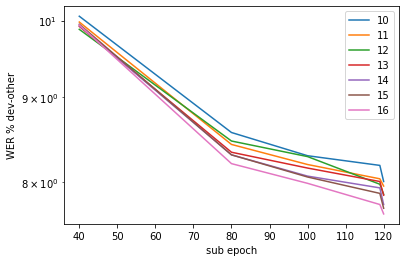

In [42]:
def x_y_for_ex(i):
    X = list(datas[i][_set]["optim_wer_by_ep"].keys())
    Y = [
    float(datas[i][_set]["optim_wer_by_ep"][x][-2][:-1]) for x in X
    ]
    X = [float(x) for x in X]
    return X, Y

plt.xlabel("sub epoch")
plt.ylabel("WER % dev-other")

for i, d in enumerate(datas):
    X, Y = x_y_for_ex(i)
    print(X)
    print(Y)
    plt.plot(X, Y, label=blocks[i])

plt.legend(loc="upper right")

plt.yscale('log')

plt.savefig(f"{ABS}/WERconvergence-num-blocks.pdf")


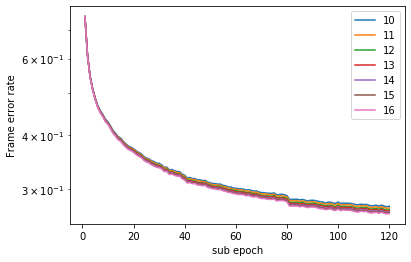

In [40]:
def x_y_for_ex(i, metric='dev_error_output'):
    X = list(datas[i][_set]["errors_per_ep"].keys())
    rm_from_x = []
    Y = []
    for x in X:
        if str(x) in datas[i][_set]["errors_per_ep"] and metric in datas[i][_set]["errors_per_ep"][str(x)]:
            Y.append(float(datas[i][_set]["errors_per_ep"][str(x)][metric]))
        else:
            rm_from_x.append(x)
            
    X = [x for x in X if not x in rm_from_x]
    X = [float(x) for x in X]
    return X, Y


plt.xlabel("sub epoch")
plt.ylabel("Frame error rate")

for i, d in enumerate(datas):
    X, Y = x_y_for_ex(i, 'train_error_output')
    #print(X)
    #print(Y)
    plt.plot(X, Y, label=blocks[i])

plt.legend(loc="upper right")
plt.yscale('log')

plt.savefig(f"{ABS}/error_convergence-num-blocks.pdf")


['baseline_04_big_short/baseline_03_big_short+batchnorm', 'baseline_04_big_short/baseline_03_big_short', 'baseline_04_big_short/baseline_03_big_short+only-shuffle', 'baseline_05_big_short/baseline_05_big_short', 'baseline_07_big_short/baseline_07_big_short+se-block-v1.0-conv-mod', 'baseline_07_big_short/baseline_07_big_short+num-blocks-16-aux-at-half', 'baseline_08_big_short/baseline_08_big_short+aux-4-8-12']
[8.85, 8.781395348837208, 8.735658914728681, 8.689922480620154, 6.334496124031008, 7.272093023255813, 8.667054263565891]
[6.408298541886067, 6.407398258468143, 6.407398258468143, 6.407398258468143, 6.436893609463607, 8.21023794098003, 8.85]
['baseline_04_big_short/baseline_03_big_short+batchnorm', 'baseline_04_big_short/baseline_03_big_short', 'baseline_04_big_short/baseline_03_big_short+only-shuffle', 'baseline_05_big_short/baseline_05_big_short', 'baseline_07_big_short/baseline_07_big_short+se-block-v1.0-conv-mod', 'baseline_07_big_short/baseline_07_big_short+num-blocks-16-aux-a

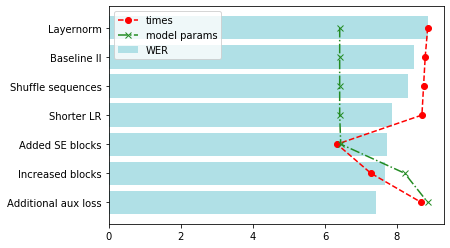

In [123]:
# Horizontal baseline progression plot
def get_best_epoch_dev_other(data):
    optim = isinstance(data["dev-other"]["optim_wer_by_ep"], dict) and len(data["dev-other"]["optim_wer_by_ep"]) > 0
    
    set_data = data["dev-other"]
    wers = set_data["optim_wer_by_ep" if optim else "wer_by_ep"]
    if isinstance(wers, str):
        return "No best ep"
    best_wer = 100
    best_ep = -1
    for x in wers:
        ep = int(x)
        wer = wers[x][-2] if optim else wers[x][0] #TODO: not sure about the no optim case
        wer = float(wer.replace("%", ""))
        if wer < best_wer:
            best_wer = wer
            best_ep = ep

    return best_ep

experiments = [
    "baseline_03_big_short+batchnorm", # BN -> LN
    "baseline_03_big_short", # baseline II
    "baseline_03_big_short+only-shuffle", # + only shuffle
    "baseline_05_big_short", # + adapted learning rate
    "baseline_07_big_short+se-block-v1.0-conv-mod", # + se blocks
    "baseline_07_big_short+num-blocks-16-aux-at-half", # + more layers
    "baseline_08_big_short+aux-4-8-12" # + aux-loss
    #"baseline_09_big_short" # + group norm
]

labels = [
    "Layernorm",
    "Baseline II",
    "Shuffle sequences",
    "Shorter LR",
    "Added SE blocks",
    "Increased blocks",
    "Additional aux loss",
    ""
]

full_ex = [
    x.split("+")[0].replace("_03_", "_04_") + "/" + x for x in experiments
]
print(full_ex)

ex_datas = []

for ex in full_ex:
    with open(f"{ABS}results2/{ex}.json") as file:
        data = json.load(file)
    ex_datas.append(data)
    
best_ep_for_ex = [
    get_best_epoch_dev_other(ex_datas[i]) for i in range(len(ex_datas))
]

def get_ex_wer(ex, ep):
    i = full_ex.index(ex)
    bestwer = float(ex_datas[i]["dev-other"]["optim_wer_by_ep"][str(ep)][-2][:-1])
    return bestwer

norm_time = [1.0] * len(full_ex)
#norm_time[4] = 1.45
def get_time(ex):
    i = full_ex.index(ex)
    return float(ex_datas[i]["dev-other"]["time_p_sep"] * norm_time[i]) * 40.0 # always 40 ep split

def get_params(ex):
    i = full_ex.index(ex)
    return ex_datas[i]["dev-other"]["num_params"]

def get_over_fit(ex):
    i = full_ex.index(ex)
    # TODO:...
    

wers_for_ex = [
    get_ex_wer(ex, best_ep_for_ex[i]) for i, ex in enumerate(full_ex)
]

times_for_ex = [
    get_time(ex) for ex in full_ex
]

params_for_ex = [
    get_params(ex) for ex in full_ex
]

max_time = max(times_for_ex)
# Normalizes times by max wer
max_wer = wers_for_ex[0]
fact = max_time / max_wer

times_for_ex = [ x/fact for x in times_for_ex]
max_size = max(params_for_ex)
fact = max_size / max_wer
params_for_ex = [ x/fact for x in params_for_ex]

print(times_for_ex)
print(params_for_ex)

print(full_ex)
print(wers_for_ex)

y_step = 1.0

Y = list(reversed([i*y_step for i in range(len(full_ex))]))

plt.barh(Y, wers_for_ex, height=0.8, color="powderblue", label="WER")

plt.plot(times_for_ex, Y,marker='o',color='r',linestyle='--', label="times")

plt.plot(params_for_ex, Y,marker='x',color='forestgreen',linestyle='-.', label="model params")

ax = plt.gca()
ax.set_yticklabels(reversed(labels))

plt.legend()

plt.savefig(f"{ABS}/out_plots/overall.pdf")


# baseline_03_big_short

[107.5483, 86.3671, 86.8285, 87.4436, 86.6749, 93.1199, 86.8285, 86.8285, 86.8285, 86.8285, 86.8285, 90.0241, 105.1516, 86.7363, 86.8285, 86.8285, 112.0189, 61.638, 86.8285, 86.8285, 74.613, 80.7207, 86.8285, 86.8285, 86.5209, 86.8285, 86.8285, 86.8285, 191.7854, 86.8285, 86.8285, 86.8285, 137.2092, 92.9362, 117.367, 87.2282, 86.8285, 86.8285, 87.0312, 86.8285, 86.8285, 99.0439, 93.7351, 111.2593, 105.7028, 86.8285, 111.7923, 111.7923, 111.7923, 111.7923, 111.6939, 111.7923, 113.3667, 112.0547, 115.8606, 111.7923, 111.7923, 111.7923, 119.9289, 111.7923, 111.7923, 247.7826, 112.3171, 111.7923, 36.289, 59.0678, 86.8285, 86.8285, 86.8407, 87.2282, 86.8285, 86.8285, 86.8285, 82.7601, 81.7243, 86.8285, 191.7854, 86.8285, 86.8285, 86.8285, 86.8285, 191.7854, 115.3276, 86.8285, 115.3276, 86.8285, 86.8285, 191.7854, 86.8285, 86.8285, 86.8285, 86.8285, 87.2282, 86.8285, 33.8344, 33.8344, 33.8344, 27.3579, 34.4496, 86.8285, 21.2177, 21.8329, 111.7923, 86.8285, 191.7854, 86.8285, 86.8285, 86.8285

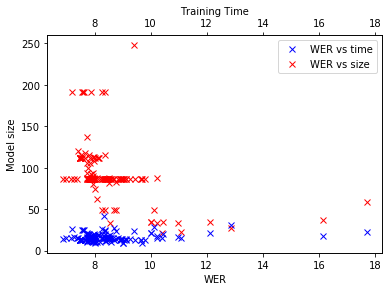

In [167]:
# Model size vs WER
import glob

def get_data(ex):
    with open(ex, "r") as file:
        data = json.load(file)
    return data

all_models = glob.glob(f"{ABS}results2/*/*")

all_datas = [get_data(x) for x in all_models]

def get_best_epoch_dev_other(data):
    try:
        optim = isinstance(data["dev-other"]["optim_wer_by_ep"], dict) and len(data["dev-other"]["optim_wer_by_ep"]) > 0

        set_data = data["dev-other"]
        wers = set_data["optim_wer_by_ep" if optim else "wer_by_ep"]
        if isinstance(wers, str):
            return "No best ep"
        best_wer = 100
        best_ep = -1
        for x in wers:
            ep = int(x)
            wer = wers[x][-2] if optim else wers[x][0] #TODO: not sure about the no optim case
            wer = float(wer.replace("%", ""))
            if wer < best_wer:
                best_wer = wer
                best_ep = ep
    except Exception as e:
        return None

    return best_ep

def get_best_wer(ep, data):
    if not ep:
        return None
    if isinstance(ep, str):
        return None
    if int(ep) < 1:
        return None
    return float(data["dev-other"]["optim_wer_by_ep"][str(ep)][-2][:-1])

def get_size(data):
    if isinstance(data["dev-other"], str):
        return None
    return data["dev-other"]["num_params"]


def get_time(data):
    if not "time_p_sep" in data["dev-other"]:
        return None
    return float(data["dev-other"]["time_p_sep"]) * 40.0 # always 40 ep split

all_best_ep = [
    get_best_epoch_dev_other(d) for d in all_datas
]

all_best_wer = [
    get_best_wer(ep, data) for ep, data in zip(all_best_ep, all_datas)
]

all_times = [
    get_time(data) for data in all_datas
]

all_size = [
    get_size(data) for data in all_datas
]

del_id = []
for i in range(len(all_size)):
    if all_best_wer[i] is None or all_size[i] is None or all_times[i] is None:
        del_id.append(i)
        
for x in reversed(del_id):
    del all_best_wer[x]
    del all_size[x]
    del all_times[x]
    
print(all_size)
print(all_best_wer)


ax1 = plt.gca()
ax1.plot(all_best_wer, all_size, marker='x',color='r',linestyle='none', label="WER vs size")
plt.xlabel("WER")
plt.ylabel("Model size")


ax2 = ax1.twiny()
ax2.set_xlabel('Training Time')
ax2.plot(all_best_wer, all_times, marker='x',color='b',linestyle='none', label="WER vs time")
ax2.plot([], [], marker='x',color='r',linestyle='none', label="WER vs size")
ax2.legend()

plt.savefig(f"{ABS}/out_plots/overall_size_vs_time.pdf")
    